In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics

# LOADING CSV FILES IN PANDAS DATAFRAME

In [3]:
emission = pd.read_csv('CO2 emission.csv')

In [4]:
emission.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


YEAR – Year of manufacturing of car.

MAKE – Manufacturing company name.

VEHICLECLASS – Type of vehicle like SUV or medium sized etc.

ENGINESIZE – Size of the car’s engine (expressed in cc or cubic centimetre).

CYLINDERS – Number of Cylinders in the engine.

TRANSMISSION – Automatic or manual transmission with number of gears.

FUELTYPE – It indicates the type of fuel car use i.e. Diesel, Petrol, Z (Unleaded Petrol) etc.

FUELCONSUMPTION_CITY – Fuel consumption or Fuel economy of car while running in city
expressed in miles per gallon.

FUELCONSUMPTION_HWY - Fuel Consumption or Fuel economy of car on highway expressed in
miles per gallon.

FUELCONSUMPTION_COMB – Net or combination of Fuel Economy expressed in miles per gallon.

FUELCONSUMPTION_COMB_MPG – Total fuel economy expressed in miles per gallon.

CO2EMISSIONS – The CO 2 emitted by the car expressed in grams.

# SELECTING ONLY NECESSARY COLUMNS

As we can see that only ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB and CO2EMISSIONS are of our use as CO2 emission quality only depends upon the engine size, number of cylinders and fuel consumption and not on the other parameters like model year,company name and vehicle category.

In [5]:
emission_defined = emission[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [6]:
emission_defined.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


# PLOTTING HISTOGRAM OF COMPLETE DATAFRAME

<Figure size 864x720 with 0 Axes>

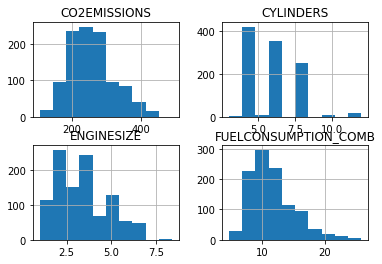

In [7]:
fig = plt.figure(figsize=(12,10))
emission_defined.hist()
plt.show()

# PLOTTING A HEATMAP FOR ALL THE COLUMNS CORRELATION

In [8]:
corr = emission_defined.corr()

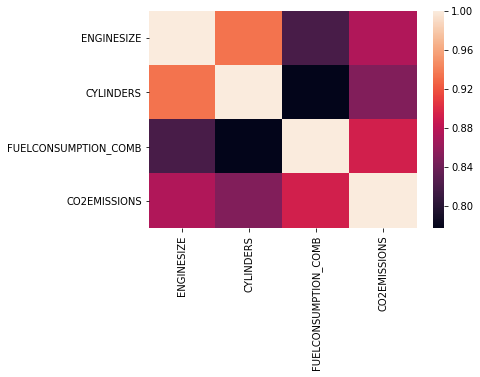

In [9]:
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()

From the above heatmap it can be seen that all columns hold high level of correlation with another but it can be easily analysed that CO2EMISSIONS is highly correlated to ENGINESIZE,FUELCONSUMPTION_COMB and slightly less with CYLINDERS.

# PLOTTING SCATTERPLOT FOR EACH PARAMETER TAKING CO2EMISSIONS AS DEPENDENT PARAMETER

because CO2EMISSIONS only depends upon the vehicle configuration so it will be a dependent variable definitely.

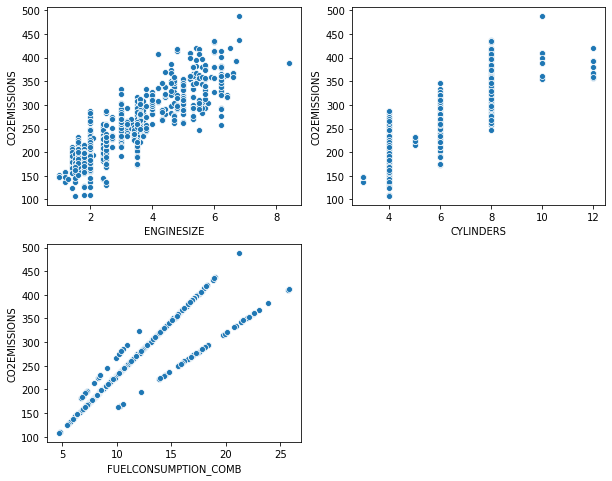

In [10]:
fig = plt.figure(figsize=(10,8))
a1 = fig.add_subplot(221)
a2 = fig.add_subplot(222)
a3 = fig.add_subplot(223)
sns.scatterplot(x = 'ENGINESIZE', y = 'CO2EMISSIONS', data = emission_defined , ax = a1)
sns.scatterplot(x = 'CYLINDERS', y = 'CO2EMISSIONS', data = emission_defined , ax = a2)
sns.scatterplot(x = 'FUELCONSUMPTION_COMB', y = 'CO2EMISSIONS', data = emission_defined , ax = a3)
plt.show()

From above plots we can notice that ENGINESIZE - CO2EMISSIONS and FUELCONSUMPTION_COMB - CO2EMISSIONS are having relationships
while CYLINDERS seems to be catgorical variable.

Hence, CYLINDERS can't contribute towards Regression.

# Now, we plot lmplot to see regression relationship between ENGINESIZE - CO2EMISSIONS and FUELCONSUMPTION_COMB - CO2EMISSIONS.

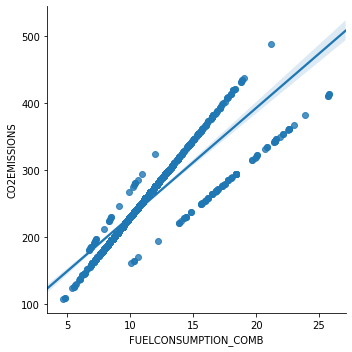

In [11]:
sns.lmplot(x = 'FUELCONSUMPTION_COMB' , y = 'CO2EMISSIONS' , data = emission_defined)
plt.show()

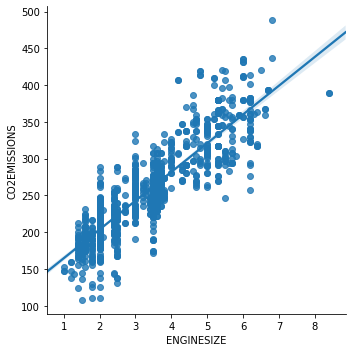

In [12]:
sns.lmplot(x = 'ENGINESIZE' , y = 'CO2EMISSIONS' , data = emission_defined)
plt.show()

So, it can be verified from above two lmplots that relationship exists between ENGINESIZE - CO2EMISSIONS and FUELCONSUMPTION_COMB - CO2EMISSIONS.

#  REGRESSION USING TRAIN  & TEST DATA SETS

   ### -  LINEAR REGRESSION 

Another way of doing Regression is by splitting data into test and train data.For this we use numpy function for generatig random number and if that number is less than 0.8 the index i is added to train_data else it is being added to test_data.
The key point to note here is that we are putting 80% data into train_data and rest 20% to test_data.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = emission[['ENGINESIZE']]
y = emission['CO2EMISSIONS']
train_x , test_x , train_y , test_y = train_test_split(x,y,test_size=0.2)

    test_data,train_data = list(),list()
    for i in range(len(emission_defined)):
        if np.random.uniform() < 0.8:
            train_data += [i]
        else:
            test_data += [i]
    
    train = emission_defined.loc[train_data]
    test = emission_defined.loc[test_data]
    
    train_x = np.asanyarray(train[['ENGINESIZE']])
    train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [33]:
regre = linear_model.LinearRegression()

In [34]:
regre.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
regre.score(train_x,train_y)

0.7650838376327082

In [36]:
print("Coefficient or Slope of regression line is: " , regre.coef_[0])
print("Intercept of regression line is: ",regre.intercept_)

Coefficient or Slope of regression line is:  39.076356618993955
Intercept of regression line is:  125.74042134873744


In [37]:
predict_y = regre.predict(test_x)

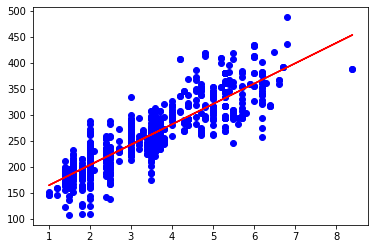

In [38]:
plt.scatter(train_x,train_y , color = 'blue')
plt.plot(train_x, regre.coef_[0]*train_x + regre.intercept_, '-r')
plt.show()

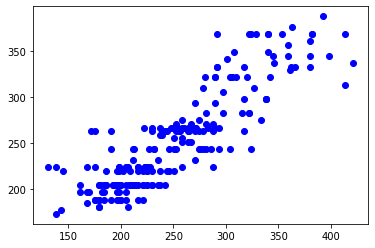

In [45]:
plt.scatter(test_y,predict_y , color = 'blue')
plt.show()

On plotting the model we can conclude that the model is accurate to some extent but the data points are scattered from the linear line as it can be visualised easily from the above plot and plotjust preceding it.

We can conclude that it is a good model but can't be used as it has errors.

Let's find out the mean squared error using metrics library.

In [40]:
print(metrics.mean_squared_error(test_y,predict_y))

910.9542677783494


To get more precise results we plot a multiple regression plot to analyse which model better fits the data.

### - MULTIPLE REGRESSION

In [23]:
multi_regr = linear_model.LinearRegression()

In [24]:
X = emission[['ENGINESIZE','FUELCONSUMPTION_COMB']]
Train_x , Test_x , Train_y , Test_y = train_test_split(X,y,test_size = 0.2)

In [25]:
multi_regr.fit(Train_x,Train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
multi_regr.score(Train_x,Train_y)

0.8529025261599446

In [42]:
print("Coefficient or Slope of regression line is: " , multi_regr.coef_[0])
print("Intercept of regression line is: ",multi_regr.intercept_)

Coefficient or Slope of regression line is:  18.845506931544755
Intercept of regression line is:  77.16391203272408


In [28]:
predict_Y = multi_regr.predict(Test_x)

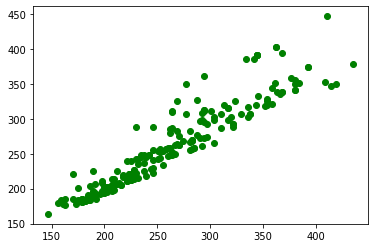

In [29]:
plt.scatter(Test_y,predict_Y , color = 'green')

On using multiple regression we get p-value as 0.85 which is near to 1  so it can be considered as a good model. Also on plotting curve we find that data points nearly fit to the regression line.

To verify we find the mean squared error using metrics library.

In [30]:
print(metrics.mean_squared_error(Test_y,predict_Y))

515.3699462879857


On finding the mean square error we notice that multiple regression is best choice to predict values as it has less mean squared error and also have good regression p-value.